In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [15]:
train = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
test =  pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')


In [16]:
train_original = train.copy()
test_original = test.copy()

In [17]:
train.keys()

Index([u'Loan_ID', u'Gender', u'Married', u'Dependents', u'Education',
       u'Self_Employed', u'ApplicantIncome', u'CoapplicantIncome',
       u'LoanAmount', u'Loan_Amount_Term', u'Credit_History', u'Property_Area',
       u'Loan_Status'],
      dtype='object')

In [18]:
train.columns

Index([u'Loan_ID', u'Gender', u'Married', u'Dependents', u'Education',
       u'Self_Employed', u'ApplicantIncome', u'CoapplicantIncome',
       u'LoanAmount', u'Loan_Amount_Term', u'Credit_History', u'Property_Area',
       u'Loan_Status'],
      dtype='object')

In [19]:
test.columns

Index([u'Loan_ID', u'Gender', u'Married', u'Dependents', u'Education',
       u'Self_Employed', u'ApplicantIncome', u'CoapplicantIncome',
       u'LoanAmount', u'Loan_Amount_Term', u'Credit_History',
       u'Property_Area'],
      dtype='object')

In [20]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [22]:
train.shape, test.shape

((614, 13), (367, 12))

In [23]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [24]:
# Normalise can be set to true to print the proportions instead of Numbers.
train['Loan_Status'].value_counts(normalize = True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

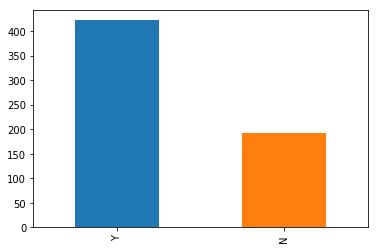

In [26]:
train['Loan_Status'].value_counts().plot.bar()

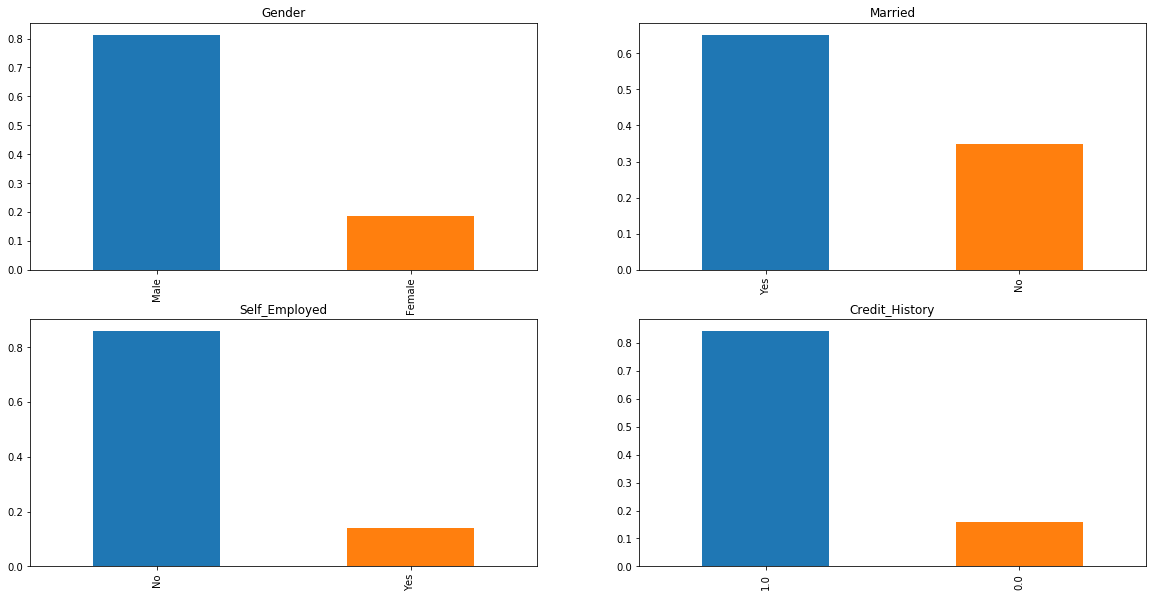

In [27]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize = True).plot.bar(figsize=(20,10),title='Gender')

plt.subplot(222)
train['Married'].value_counts(normalize = True).plot.bar(figsize=(20,10),title='Married')

plt.subplot(223)
train['Self_Employed'].value_counts(normalize = True).plot.bar(figsize=(20,10),title='Self_Employed')

plt.subplot(224)
train['Credit_History'].value_counts(normalize = True).plot.bar(figsize=(20,10),title='Credit_History')



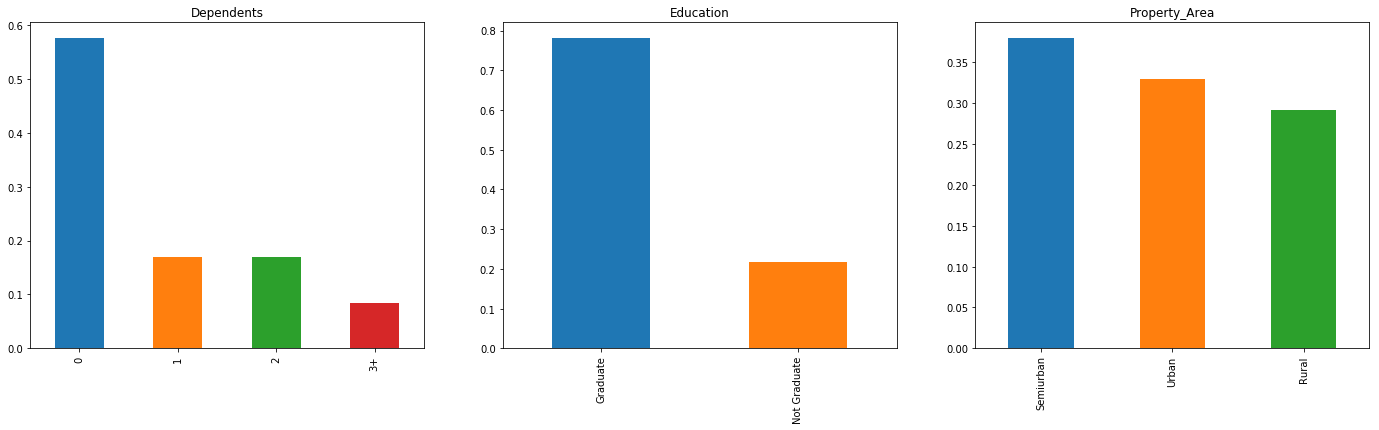

In [28]:
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize = True).plot.bar(figsize=(24,6),title='Dependents')

plt.subplot(132)
train['Education'].value_counts(normalize = True).plot.bar(figsize=(24,6),title='Education')

plt.subplot(133)
train['Property_Area'].value_counts(normalize = True).plot.bar(figsize=(24,6),title='Property_Area')



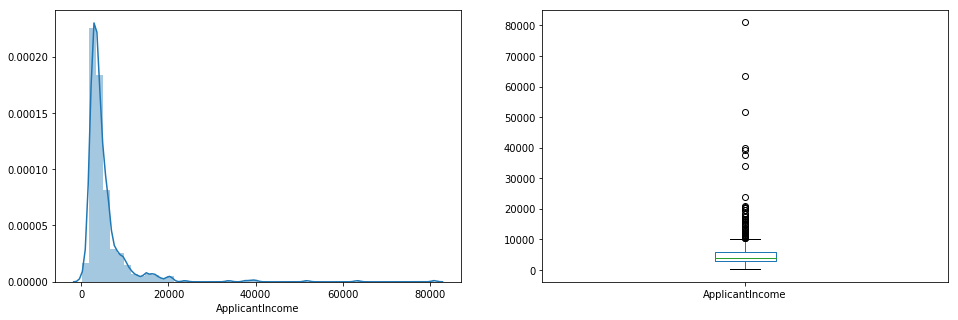

In [29]:
# Visualize numerical data
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome']);

plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

Text(0.5,0.98,'')

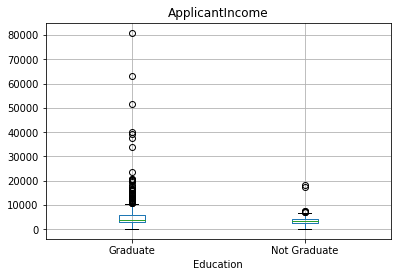

In [30]:
train.boxplot(column='ApplicantIncome', by ='Education')
plt.suptitle("")

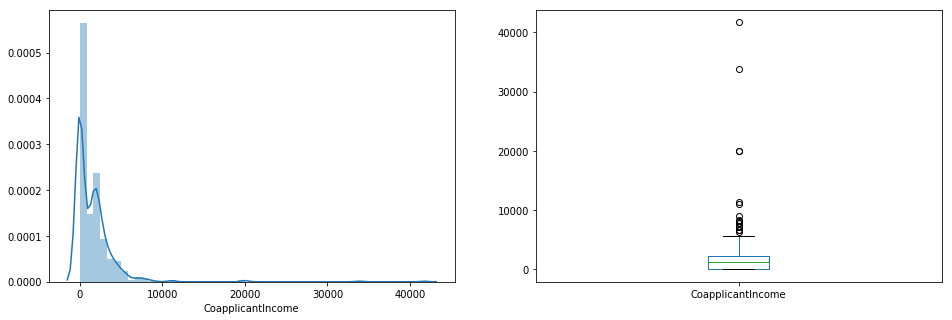

In [31]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])

plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show()

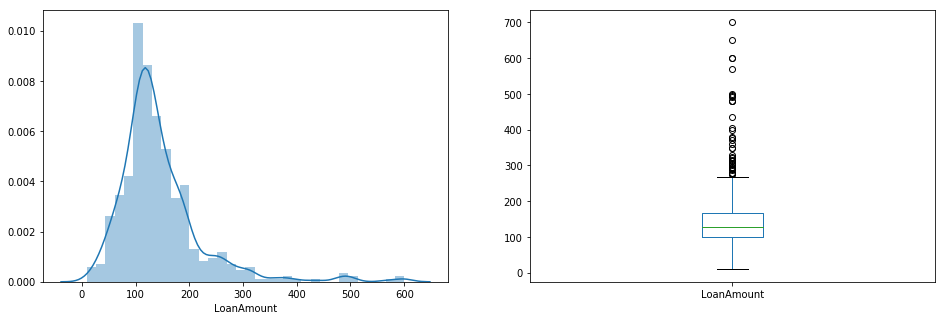

In [32]:
# Distribution of LoanAmount

plt.figure(1)
plt.subplot(121)
df = train.dropna()
sns.distplot(df['LoanAmount']);

plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

In [33]:
# Missing values and outlier training
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [34]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [35]:
#imputation of mode
train['Gender'].fillna(train['Gender'].mode()[0],inplace = True)
train['Married'].fillna(train['Married'].mode()[0],inplace = True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace = True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace = True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace = True)

In [37]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [40]:
# find a way to fill the missing values in Loan_Amount_Term.
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [42]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [43]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [44]:
#imputation of mode
test['Gender'].fillna(train['Gender'].mode()[0],inplace = True)
test['Dependents'].fillna(train['Dependents'].mode()[0],inplace = True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace = True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace = True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

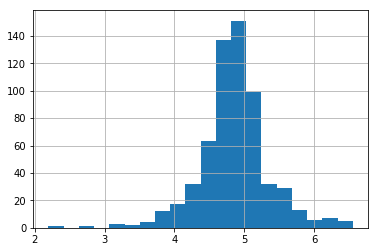

In [46]:
# Outlier Treatment
#Effect of log treatment
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log'] = np.log(test['LoanAmount'])

In [47]:
# Bivariate Analysis
train.describe()
train.shape


(614, 14)

In [48]:
train.dropna()
train.shape

(614, 14)

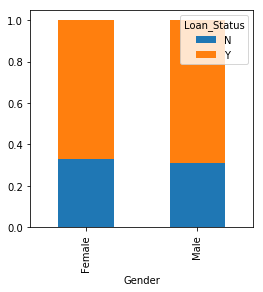

In [49]:
Gender = pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (4,4))


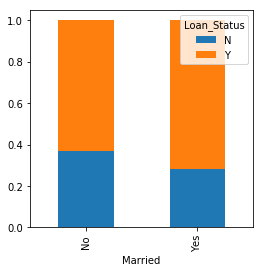

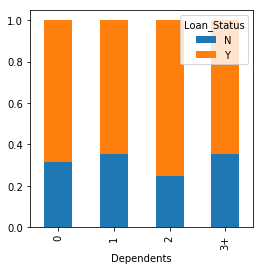

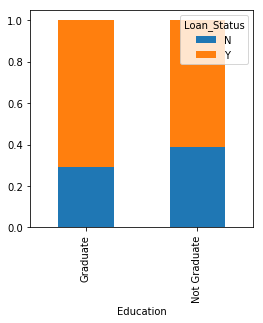

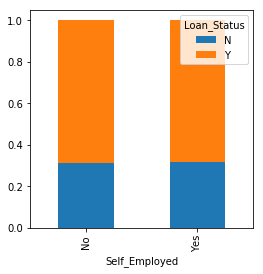

In [50]:
Married = pd.crosstab(train['Married'],train['Loan_Status'])
Dependents = pd.crosstab(train['Dependents'],train['Loan_Status'])
Education = pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed = pd.crosstab(train['Self_Employed'],train['Loan_Status'])

Married.div(Married.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (4,4))
plt.show()

Dependents.div(Dependents.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (4,4))
plt.show()

Education.div(Education.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (4,4))
plt.show()

Self_Employed.div(Self_Employed.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (4,4))
plt.show()



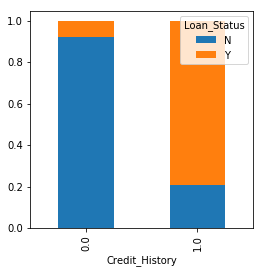

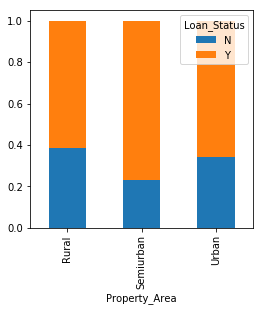

In [51]:
Credit_History = pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area = pd.crosstab(train['Property_Area'],train['Loan_Status'])

Credit_History.div(Credit_History.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (4,4))
plt.show()

Property_Area.div(Property_Area.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (4,4))
plt.show()


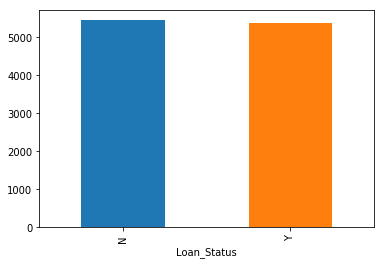

In [52]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [53]:
bins=[0,2500,4000,6000,81000]
group=['High','Average','Low', 'Very high']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,right=True,labels=group)

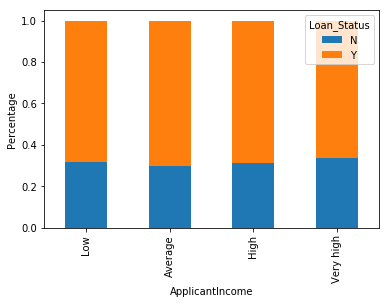

In [54]:
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')

Text(0,0.5,'Percentage')

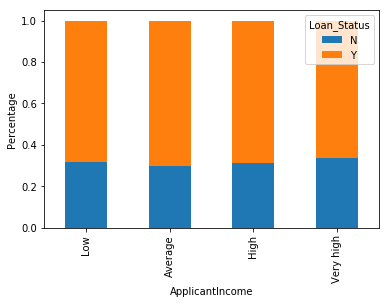

In [55]:
# Analyze coapplicant
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')

In [56]:
bins = [0,1000,3000,42000]
group = ['Low', 'Average', 'High']
train['Coapplicant_Income_bin'] = pd.cut(train['CoapplicantIncome'],bins,include_lowest=True,labels=group)

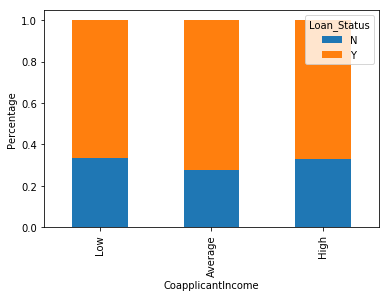

In [60]:
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')

In [63]:
# Combine Applicant's and Coapplicant's income
train['Total_Income'] = train['ApplicantIncome']+train['CoapplicantIncome']

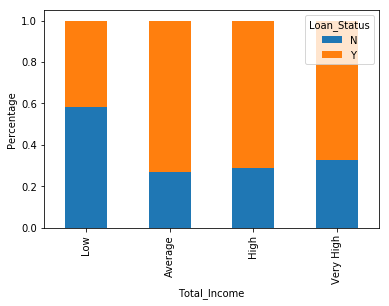

In [64]:
bins = [0,2500,4000,6000,81000]
group = ['Very High', 'High', 'Low', 'Average']
train['Total_Income_bin'] = pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')

In [65]:
#Loan Amount Analysis
bins = [0,100,200,700]
group = ['Average', 'Low', 'High']
train['LoanAmount_bin'] = pd.cut(train['LoanAmount'],bins,labels=group)

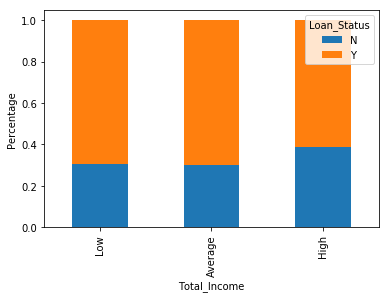

In [66]:
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')

In [67]:
train = train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis = 1)


In [68]:
train['Dependents'].replace('3+', 3,inplace = True)
test['Dependents'].replace('3+', 3,inplace = True)
train['Loan_Status'].replace('N', 0,inplace = True)
train['Loan_Status'].replace('Y', 1,inplace = True)





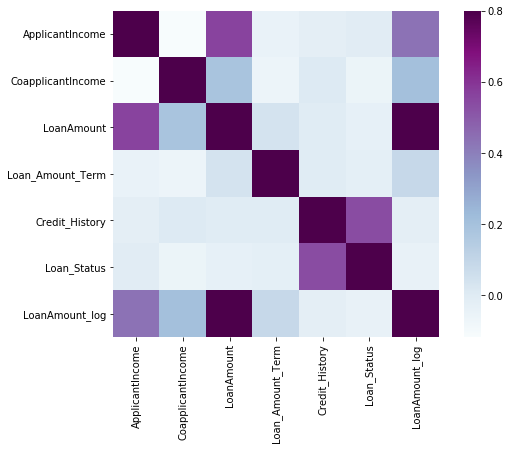

In [75]:
# HeatMap Visualization
matrix = train.corr()
f, ax = plt.subplots(figsize = (9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap = "BuPu")

In [87]:
# prediciting binary outcome using logistic regression
X = train.drop('Loan_Status',1)
y = train.Loan_Status

In [88]:
# we will make dummy variables for the categorical variables.
#Dummy variable turns categorical variables into a series of 0 and 1, making them lot easier to quantify and compare.
X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [89]:
from sklearn.model_selection import train_test_split

In [91]:
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)
# The dataset has been divided into training and validation part

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [93]:
model = LogisticRegression()
model.fit(x_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').